In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import homogeneity_completeness_v_measure
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import cv2
import glob
from PIL import Image
import regex


In [2]:
def read_images():
    image_samples=[]
    boundries=[]
    segmentation_Gt=[]
    images_list=[]
    path= 'BSR/BSDS500/data/images/train/'
    path_mat= 'BSR/BSDS500/data/groundTruth/train/'
    for filename in glob.glob(path+"*.jpg"): 
        im=Image.open(filename) #read file name 
        img = np.array(im) # convert pil to numpy array
        images_list.append(img) 
        image_samples.append(img.reshape(img.shape[0]*img.shape[1], 3)) # reshape to samples 
        image_number=regex.split(r'.jpg',regex.split(r'/', filename)[5])[0] # get the number of the image
        temp= sio.loadmat(path_mat+image_number) # read boundries, groundtruth
        boundries.append(temp['groundTruth'][0][0]['Boundaries'][0][0]) #extract boundries 
        segmentation_Gt.append(temp['groundTruth'][0][0]['Segmentation'][0][0]) #extract ground truth
    return images_list, image_samples, boundries, segmentation_Gt

In [3]:
def visualize(img,segmentation_Gt,boundries ):
    m=plt.figure(1)
    plt.imshow(img)
    m.show()
    
    s=plt.figure(2)
    plt.imshow(segmentation_Gt)
    s.show()
    
    b=plt.figure(3)
    plt.imshow(boundries)
    b.show()

In [24]:
def evaluate(y_pred, y_true):
    #if (meaure=="F_measure"):
    F_measure_score= f1_score(y_true, y_pred, average=None)
    #else if(measure== "conditional_entropy"):
    conditional_entropy_score= homogeneity_completeness_v_measure(y_true, y_pred)
    #print("F-measure=", F_measure_score, "\n conditional entropy score=",conditional_entropy_score )
    return F_measure_score, conditional_entropy_score

In [22]:
k=[3,5,7,9,11]
listOfDicts=[]
def K_means(X):
    sdict=dict()
    for i in k:
        kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
        sdict[i]=kmeans.labels_
    listOfDicts.append(sdict)
    return listOfDicts

In [17]:
images_list,image_samples, boundries, segmentation_Gt= read_images()

/Users/khaledmohab/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/khaledmohab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/khaledmohab/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/khaledmohab/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/khaledmohab/anaconda3/lib/

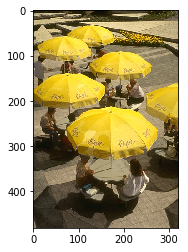

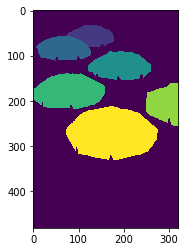

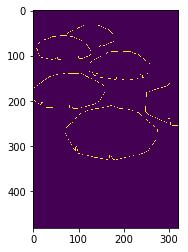

In [26]:
PicsNum=5
f_measures=np.zeros((PicsNum,len(k)))
entropy_score=np.zeros((PicsNum,len(k)))
for i in range(PicsNum):
    counter=0
    km=K_means(image_samples[i])
    visualize(images_list[i],segmentation_Gt[i],boundries[i] )
    for j in range(3,12,2):
        y_pred=km[i][j]
        y_true=segmentation_Gt[i].reshape(segmentation_Gt[i].shape[0]*segmentation_Gt[i].shape[1])
        F_measure_score, conditional_entropy_score= evaluate(y_pred, y_true)
        f_measures[i,counter]=np.sum(F_measure_score)
        entropy_score[i,counter]=np.sum(conditional_entropy_score)
        counter+=1

In [29]:
np.sum(f_measures,0)/5


array([0.34839353, 0.51550834, 0.38029304, 0.45911328, 0.41927804])